# 광산구에는 어떠한 방재시설이 있을까?
---   
***Last Edit - May 19. 2023. Dohyeon Kwon.***  
<br>
공공데이터를 활용하여 광주광역시 광산구에 설치된 방재시설의 설치 현황을 시각화 해보는 프로젝트.  


## 개요
다가오는 장마철에 폭우, 태풍 등 재해에 대비할 수 있는 방재시설의 설치 현황이 궁금하여 이번 프로젝트를 진행합니다.  
현재 데이터는 광주광역시 광산구와 관련한 데이터이지만, 광주광역시 또는 다른 도시에서도 방재시설은 중요합니다.  
따라서, 향후 추가 데이터와 함께 데이터 전처리만 된다면 충분히 활용할 수 있도록 시각화 해 보고자 합니다.

## 활용 기술 
다음과 같은 기술을 활용합니다.
- Python
- Pandas
- Matplotlib
- Seaborn

## 자료 출처
공공데이터포털의 [광주광역시_광산구_방재시설물](https://www.data.go.kr/data/15044860/fileData.do) 자료를 활용합니다.  
분석하는 데이터는 2022년 12월 31일을 기준으로 최종 업데이트 되었습니다.

## 목차 
i. [데이터 구조 파악](#데이터-구조-파악)  
ii. [데이터 전처리](#데이터-전처리)  
iii. [데이터 시각화 - 행정구역별 방재시설 설치 현황](#데이터-시각화---행정구역별-방재시설-설치-현황)  

## 데이터 구조 파악

공공데이터포털에서 제공하는 컬럼정의서를 통해 시각화를 진행할 컬럼에 대해 확인한 결과입니다.  
시각화를 진행할 데이터는 다음과 같은 컬럼으로 구성되어 있음을 확인 할 수 있습니다.
| 항목명 | 항목설명 |
|:-----|:-------:|
| 연번 | 방재시설물의 일련번호 |
| 구분 | 방재시설물의 종류 구분 |
| 시설명칭 | 방재시설물의 명칭 |
| 주소 | 방재시설물 소재지 주소 |
| 위도 | 방재시설물의 위치정보(위도) |
| 경도 | 방재시설물의 위치정보(경도) |
| 데이터기준일 | 방재시설물 데이터의 작성일자 |

현재의 데이터 분석 목표는 일련번호가 중요하지 않으므로 "연번" 컬럼은 크게 의미가 없습니다.  
"주소" 컬럼 또한 "위도"와 "경도"가 주어지므로 크게 의미가 없습니다.  

데이터 파일을 Pandas 데이터프레임으로 불러와서 분석과 전처리를 진행하겠습니다.  
위의 컬럼정의서와 Pandas 데이터프레임의 컬럼이 일치합니다.  
**모든 컬럼에 대해 결측치가 없는 행이 258개로 동일함을 확인할 수 있습니다.**  
Dtype 또한 "위도" 와 "경도" 가 실수로서 주어짐을 확인하였습니다.  

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 및 seaborn 한글 출력 불가 관련 폰트 조치
# macOS 대응
# plt.rc('font', family="AppleGothic")
# Windows 대응
plt.rc('font', family="Malgun Gothic")


# Pandas를 통해 DataFrame 으로 만든 다음 분석
safers = pd.read_csv("./광주광역시_광산구_방재시설물_20221231.csv")

print("데이터프레임 정보")
safers.info()

데이터프레임 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연번       258 non-null    int64  
 1   구분       258 non-null    object 
 2   시설명칭     258 non-null    object 
 3   주소       258 non-null    object 
 4   위도       258 non-null    float64
 5   경도       258 non-null    float64
 6   데이터기준일자  258 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 14.2+ KB


데이터프레임에 대해 추가로 더 분석을 진행한 결과 다음과 같습니다.  
"데이터기준일자" 컬럼은 "2022.12.31" 로 모두 동일한 값을 가졌음을 확인할 수 있습니다.  
258개의 행을 가졌음을 확인할 수 있습니다.  
실제로 결측치가 전혀 없음을 추가로 확인하였습니다.  

In [2]:
print("데이터기준일자: ", safers["데이터기준일자"].unique())
print("데이터프레임의 크기:", safers.shape)
print("결측치가 존재하는 행: ", safers.isnull().sum().sum())

데이터기준일자:  ['2022.12.31']
데이터프레임의 크기: (258, 7)
결측치가 존재하는 행:  0


마지막으로, 모든 데이터가 광산구 소재의 방재시설이 맞는지 검토하겠습니다.  
Pandas의 str.contains 메소드를 통해 "주소" 컬럼의 값들이 "광산구" 를 포함하는지 확인하겠습니다.

In [3]:
safers["주소"].str.contains("광산구").count()

258

**258개의 모든 행이 "주소" 컬럼에 "광산구" 를 포함하고 있음을 확인할 수 있습니다.  
이미 데이터 전처리가 이루어졌다고 봐야하는 훌륭한 데이터 집합입니다.**

## 데이터 전처리

이제 본격적으로 데이터 시각화를 위한 전처리 작업을 진행하겠습니다.  
먼저 불필요한 "연번" 컬럼을 제거하겠습니다.  
**만일을 대비하여 다른 변수로서 데이터프레임을 추가로 선언한 다음에 작업을 진행하겠습니다.  
작업이 잘 이루어졌는지도 같이 확인할 것입니다.**

In [4]:
safe = safers
safe
safe = safe.drop(["연번"], axis = 1)

print(safe.shape)
safe.head(5)

(258, 6)


,구분,시설명칭,주소,위도,경도,데이터기준일자
0,배수펌프장,용봉배수펌프장,광주광역시 광산구 용봉길92(용봉동),35.071619,126.771535,2022.12.31
1,배수펌프장,동곡배수펌프장,광주광역시 광산구 마곡길39(본덕동),35.084279,126.787632,2022.12.31
2,배수펌프장,송대배수펌프장,광주광역시 광산구 송대동 13-5,35.105792,126.804541,2022.12.31
3,배수펌프장,우산배수펌프장,광주광역시 광산구 우산천변길261(우산동),35.153189,126.823316,2022.12.31
4,배수펌프장,운남배수펌프장,광주광역시 광산구 우산동 591,35.165685,126.820880,2022.12.31


**"주소" 컬럼은 필요하지 않지만, 행정구역 별로 시설이 얼마나 있는지 확인하고 싶습니다.**  
따라서 "주소" 를 기반으로 "행정구역" 컬럼을 생성하겠습니다.  
"행정구역" 컬럼의 값은 행정동 이름만 가지도록 처리하겠습니다.  
Pandas의 str.extract("(\w*)") 메소드를 사용하였습니다.

In [5]:
safe["행정구역"] = safe["주소"].str.extract("(\w*동)")

safe.head(5)

,구분,시설명칭,주소,위도,경도,데이터기준일자,행정구역
0,배수펌프장,용봉배수펌프장,광주광역시 광산구 용봉길92(용봉동),35.071619,126.771535,2022.12.31,용봉동
1,배수펌프장,동곡배수펌프장,광주광역시 광산구 마곡길39(본덕동),35.084279,126.787632,2022.12.31,본덕동
2,배수펌프장,송대배수펌프장,광주광역시 광산구 송대동 13-5,35.105792,126.804541,2022.12.31,송대동
3,배수펌프장,우산배수펌프장,광주광역시 광산구 우산천변길261(우산동),35.153189,126.823316,2022.12.31,우산동
4,배수펌프장,운남배수펌프장,광주광역시 광산구 우산동 591,35.165685,126.820880,2022.12.31,우산동


이제 행정구역 별로 어떠한 방재시설이 있는지 확인해보겠습니다.  
**하지만, 행정구역 목록을 확인해보니 결측치가 확인됩니다.  
도로명주소 적용으로 인해 "주소" 컬럼에 "동"이 기재되지 않은 것으로 추측됩니다.**

In [6]:
safe["행정구역"].unique()

array(['용봉동', '본덕동', '송대동', '우산동', '황룡동', '송산동', '송치동', '선동', '오산동',
       '유계동', '신촌동', '신창동', '신가동', '장록동', '송정동', '산월동', '평동', '박호동', nan,
       '하산동', '연산동', '지죽동', '지평동', '산수동', '임곡동', '사호동', '광산동', '등임동',
       '운남동', '선암동', '남산동', '산막동', '내동송동', '도덕동', '본량동', '오운동', '덕림동',
       '동호동', '양산동', '동림동', '월곡동', '수완동', '장덕동', '도천동', '비아동', '요기동',
       '동곡동', '월전동', '옥동', '용곡동', '진곡동', '오선동', '하남동'], dtype=object)

In [7]:
safe[safe["행정구역"].isnull() == True]

,구분,시설명칭,주소,위도,경도,데이터기준일자,행정구역
25,배수문,용봉배수펌프장 배수문,광주광역시 광산구 용봉길 92,35.071619,126.771535,2022.12.31,NaN
26,배수문,동곡배수펌프장 배수문,광주광역시 광산구 마곡길 39,35.084279,126.787632,2022.12.31,NaN
29,배수문,우산배수펌프장 배수문,광주광역시 광산구 우산천변길 261,35.153189,126.823316,2022.12.31,NaN
30,배수문,운남배수펌프장 배수문,광주광역시 광산구 풍영철길로 106-2,35.165497,126.820837,2022.12.31,NaN


결측치가 있는 행을 확인해본 결과 모두 구분이 "배수문" 입니다.  
하지만 행정구역 값이 있는 배수문의 개수가 44개나 됩니다.  
**하지만 시설명칭의 값과 행정구역의 값 간에는 유의미한 상관관계가 있음을 확인할 수 있습니다.  
"시설명칭"의 앞 두글자를 토대로 "용봉", "동곡", "우산", "운남" 임을 예측할 수 있습니다.**

In [8]:
# 조건문이 기므로 변수로 담아서 추가합니다.
req1 = safe["행정구역"].notnull() == True
req2 = safe["구분"] == "배수문"
print("행정구역 값이 있는 배수문의 개수: ", safe[req1 & req2].shape)
safe[req1 & req2].head()

행정구역 값이 있는 배수문의 개수:  (44, 7)


,구분,시설명칭,주소,위도,경도,데이터기준일자,행정구역
27,배수문,송정배수펌프장 배수문,광주광역시 광산구 황룡동 415-4,35.124794,126.785389,2022.12.31,황룡동
28,배수문,송대배수펌프장 배수문,광주광역시 광산구 송대동 13-5,35.105792,126.804541,2022.12.31,송대동
31,배수문,죽산배수펌프장 배수문,광주광역시 광산구 송산동 255-10,35.158236,126.733243,2022.12.31,송산동
32,배수문,산수배수펌프장 배수문,광주광역시 광산구 송치동 183-18,35.173883,126.740436,2022.12.31,송치동
33,배수문,산막배수펌프장 배수문,광주광역시 광산구 선동 3-9,35.196895,126.758437,2022.12.31,선동


결측치를 가진 행이 적었다면 수기로 편집할 수 있겠지만, 행이 많다면 굉장히 곤란한 상황입니다.  
**람다식을 활용하여 결측치를 가진 행의 "행정구역" 에는 시설명칭의 앞 두글자+동이 값으로 삽입되도록 구현하겠습니다.**


In [9]:
# 행정구역이 결측치인 조건을 변수로
area_null = safe["행정구역"].isnull() == True

# 행정구역이 결측치인 df에서 "시설명칭" 만 추출한 것을 변수로
# 람다식을 사용하여 앞 두글자와 "동" 을 반환하도록 적용.
area_null_sname = safe.loc[area_null, "시설명칭"].apply(lambda x : x[:2]+"동")

# 이후 loc로 뽑아낸 "행정구역" 에 area_null_sname 적용
safe.loc[(area_null), "행정구역"] = area_null_sname

# 결측치가 없음을 확인
print("결측치 정보")
safe.isnull().sum()

결측치 정보


구분         0
시설명칭       0
주소         0
위도         0
경도         0
데이터기준일자    0
행정구역       0
dtype: int64

결측치에 대한 람다식이 정상적으로 적용된 것을 확인할 수 있습니다.

마지막으로 "주소" 컬럼을 제거하고 safe 데이터프레임에 대해 한 번 더 검토합니다.

In [10]:
# safe = safe.drop(["주소"], axis=1)
print(safe.isnull().sum())
print("safe의 shape: ", safe.shape)

구분         0
시설명칭       0
주소         0
위도         0
경도         0
데이터기준일자    0
행정구역       0
dtype: int64
safe의 shape:  (258, 7)


In [11]:
safe.head(5)

,구분,시설명칭,주소,위도,경도,데이터기준일자,행정구역
0,배수펌프장,용봉배수펌프장,광주광역시 광산구 용봉길92(용봉동),35.071619,126.771535,2022.12.31,용봉동
1,배수펌프장,동곡배수펌프장,광주광역시 광산구 마곡길39(본덕동),35.084279,126.787632,2022.12.31,본덕동
2,배수펌프장,송대배수펌프장,광주광역시 광산구 송대동 13-5,35.105792,126.804541,2022.12.31,송대동
3,배수펌프장,우산배수펌프장,광주광역시 광산구 우산천변길261(우산동),35.153189,126.823316,2022.12.31,우산동
4,배수펌프장,운남배수펌프장,광주광역시 광산구 우산동 591,35.165685,126.820880,2022.12.31,우산동


성공적으로 전처리되었음을 확인할 수 있습니다.

## 데이터 시각화 - 행정구역별 방재시설 설치 현황

이제 행정구역별로 방재시설 보유 현황을 그래프로 표현해 보겠습니다.  
**송산동에 자연배수문을 가장 많이 설치된 것을 확인할 수 있습니다.  
광주광역시는 내륙지방이므로 송산동은 강과 인접한 동으로 유추됩니다.  
별도로 확인한 결과 송산동은 송산유원지 등 황룡강과 인접한 지역입니다.**

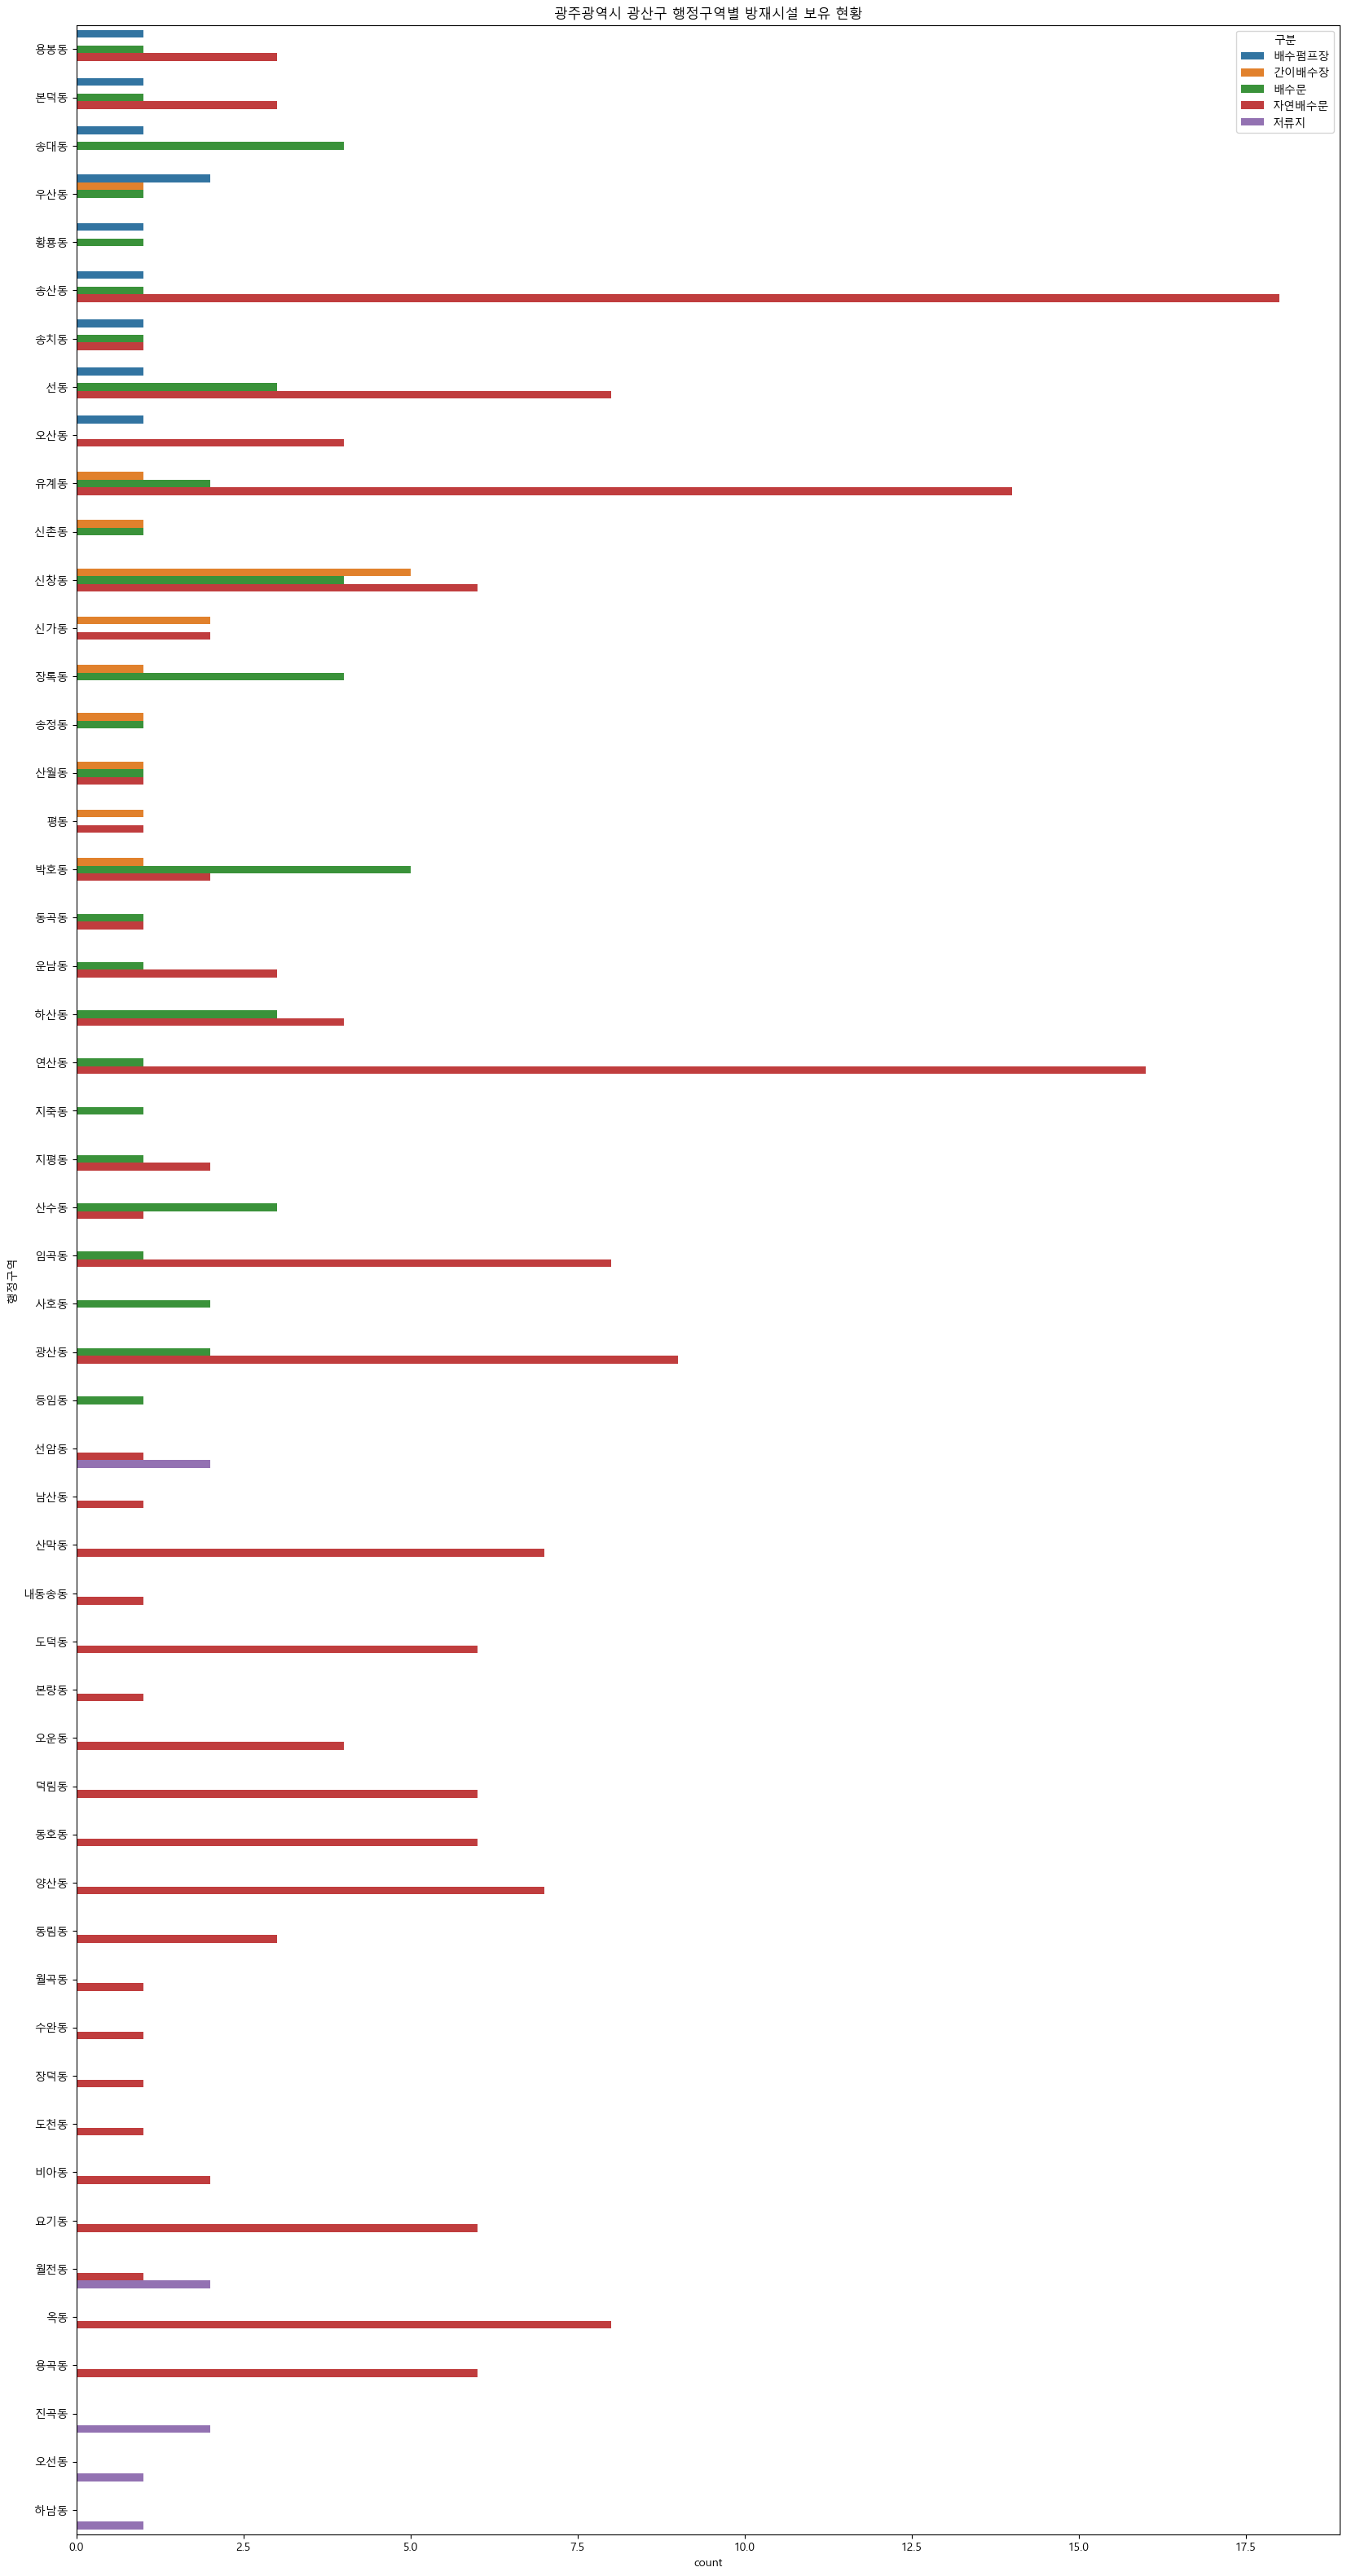

In [14]:
plt.figure(figsize = (20, 40))

# y와 y 인자의 순서는 무관함 - Matplotlib.
sns.countplot(data=safe, y = "행정구역", hue = "구분")
plt.title("광주광역시 광산구 행정구역별 방재시설 보유 현황")

plt.show()

그룹화 된 데이터프레임과 피벗테이블로서는 아래와 같이 확인할 수 있습니다.

In [11]:
safe_pivot = safe[["행정구역", "구분", "시설명칭"]].groupby(["행정구역", "구분"]).count()
safe_pivot

시설명칭
행정구역 구분         
광산동  배수문       2
     자연배수문     9
남산동  자연배수문     1
내동송동 자연배수문     1
덕림동  자연배수문     6
...          ...
하남동  저류지       1
하산동  배수문       3
     자연배수문     4
황룡동  배수문       1
     배수펌프장     1

[90 rows x 1 columns]

In [12]:
pd.pivot_table(safe_pivot, index=["행정구역", "구분"], values="시설명칭").sort_values(by=["행정구역"], ascending=False).T

행정구역   황룡동       하산동     하남동    평동       진곡동   지평동      ...   동림동   동곡동       
구분   배수펌프장 배수문 자연배수문 배수문 저류지 자연배수문 간이배수장 저류지 자연배수문 배수문  ... 자연배수문 자연배수문 배수문   
시설명칭     1   1     4   3   1     1     1   2     2   1  ...     3     1   1  \

행정구역   도천동   도덕동   덕림동  내동송동   남산동   광산동      
구분   자연배수문 자연배수문 자연배수문 자연배수문 자연배수문 자연배수문 배수문  
시설명칭     1     6     6     1     1     9   2  

[1 rows x 90 columns]

## 데이터 시각화 결과

각 행정구역별로 적재적소에 배수문, 자연배수문, 저류지, 간이배수장, 저류지가 고르게 분포해 있는 것을 확인할 수 있습니다.  
추후 본 데이터를 통해서 더 쉽게 눈으로 확인할 수 있는 추가 시각화를 진행하고자 합니다.